In [118]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

## Load data from CSV

In [119]:
data = pd.read_csv('datasets/haberman-dataset/haberman.csv')
X = data.iloc[:, 0:3]
y = data.iloc[:, 3]

## Visualize dataset

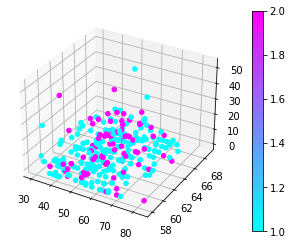

In [120]:

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=data.iloc[:, 3], cmap=plt.cool(), alpha=1)
plt.colorbar(img)
plt.show()

## Split dataset into training and testing sets

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit KNN classifier for different values of n_neighnors

In [122]:
train_accuracy = {}
test_accuracy = {}
for n_neighbor in range(1, 16):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn_classifier.fit(X_train, y_train)
    train_accuracy[n_neighbor] = knn_classifier.score(X_train, y_train)
    test_accuracy[n_neighbor] = knn_classifier.score(X_test, y_test)

## Plot training ad testing accuracies for each n_neighbor

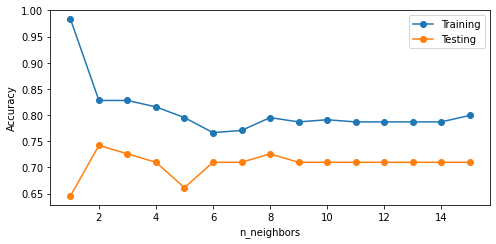

Maximum testing accuracy obtained is 74.19354838709677 for n_neighbor = 2
Training accuracy for n_neighbor = 2 is 82.78688524590164


In [123]:
plt.plot(train_accuracy.keys(), train_accuracy.values(), 'o-')
plt.plot(test_accuracy.keys(), test_accuracy.values(), 'o-')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

optimal_model_params = {'Training Accuracy': train_accuracy[max(test_accuracy, key=test_accuracy.get)] * 100,
                       'Testing Accuracy': max(test_accuracy.values()) * 100,
                        'n_neighbor': max(test_accuracy, key=test_accuracy.get)}
print('Maximum testing accuracy obtained is {} for n_neighbor = {}'.format(optimal_model_params['Testing Accuracy'],
                                                                            optimal_model_params['n_neighbor']))
print('Training accuracy for n_neighbor = {} is {}'.format(optimal_model_params['n_neighbor'], optimal_model_params['Training Accuracy']))

## Train KNN classifier for optimal value of n_neighbor

In [124]:
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_model_params['n_neighbor'])
optimal_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Evaluate the model

In [125]:
predictions = optimal_knn_classifier.predict(X_test)
print('Confusion Matrix : \n {} \n'.format(confusion_matrix(y_test, predictions)))
print('Classification Report : \n {}'.format(classification_report(y_test, predictions)))

Confusion Matrix : 
 [[41  3]
 [13  5]] 

Classification Report : 
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        44
           2       0.62      0.28      0.38        18

    accuracy                           0.74        62
   macro avg       0.69      0.60      0.61        62
weighted avg       0.72      0.74      0.71        62

